# **Feature Engineering and Selection**

In [2]:
# Importing important modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preprocessing**

In [3]:
# Loading data
df = pd.read_csv('C:\\Users\\shiwa\\Downloads\\heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Data Cleaning**

In [7]:
# Checking null values
df.isnull().sum().sum()

0

In [25]:
# Checking duplicates 
df.duplicated().sum()

723

In [27]:
# Removing duplicated values
df.drop_duplicates(inplace=True)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Data Visualization**

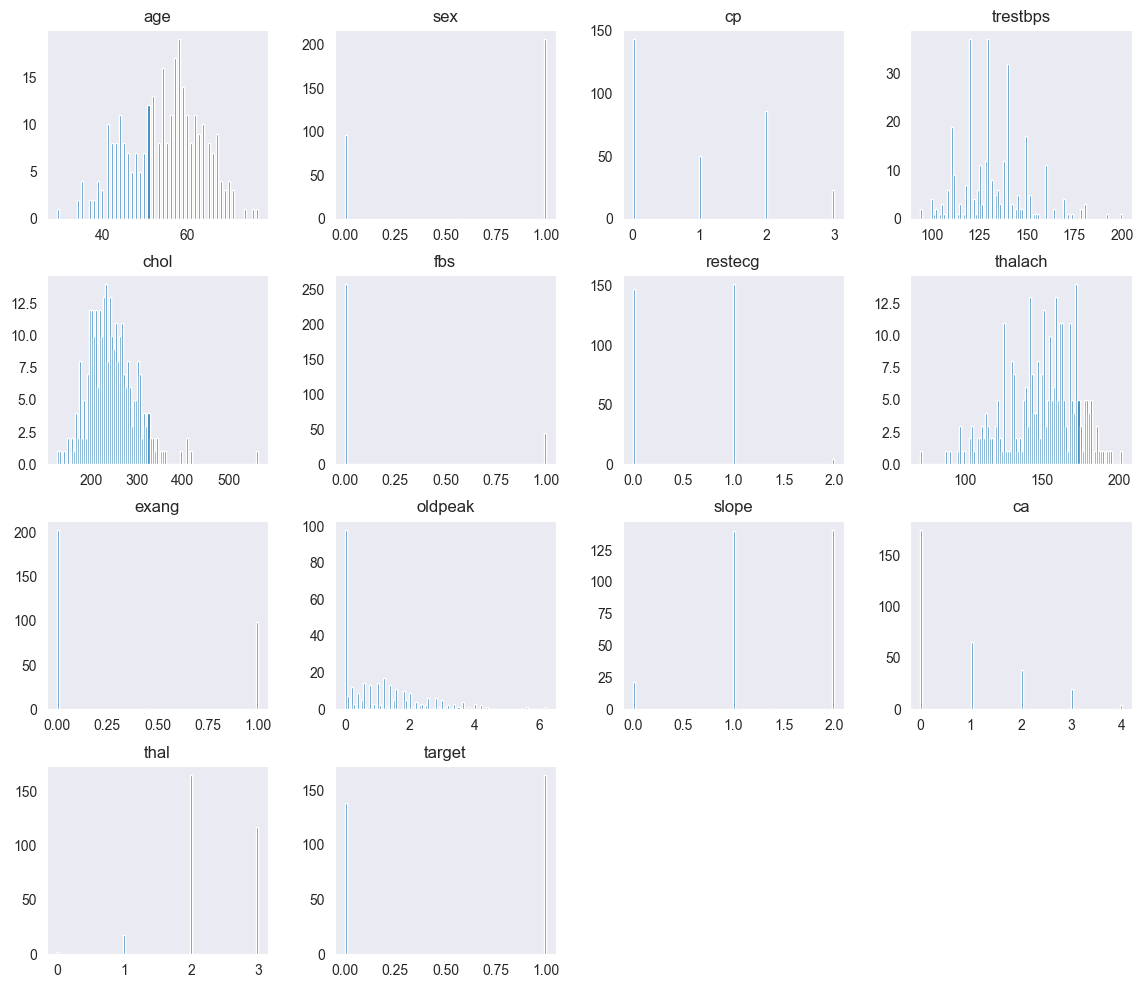

In [65]:
# Plotting histogram for all numeric values
df.hist(bins = 100, figsize=(14,12), grid = False)
plt.show()

**How many people have heart disease**

In [56]:
# Calculating how many have heart disease and how many haven't
df['target'].value_counts() # 1 - Has heart disease,   0 - No Heart disease

target
1    164
0    138
Name: count, dtype: int64

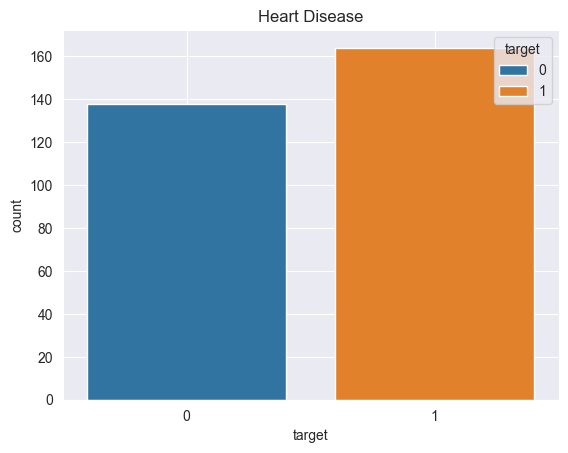

In [77]:
# Plotting how many have heart disease
sns.set_style('dark')
sns.countplot(df, x = 'target', hue = 'target')
plt.title('Heart Disease')
plt.grid(True)
plt.show()

**People of which sex has the most heart disease**

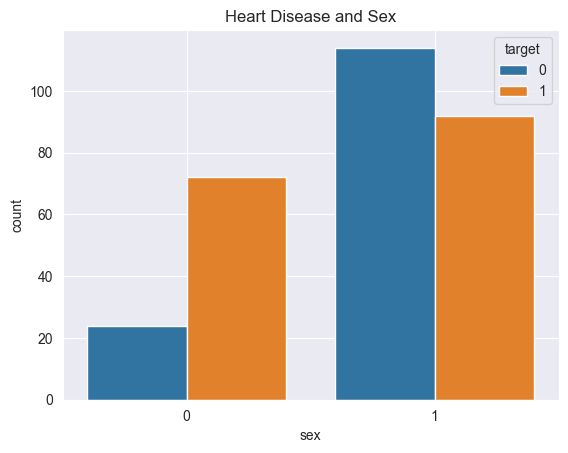

In [78]:
# Identifying which sex is more prone to heart disease
sns.countplot(df, x = 'sex', hue = 'target')
plt.title('Heart Disease and Sex')
plt.grid(True)
plt.show()

**People of which sex have which chest pain the most**

In [79]:
# Identifying different types of chest pains
df['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

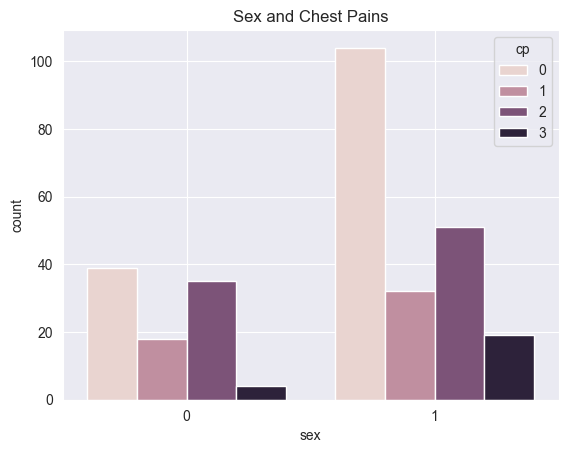

In [80]:
# Identifying which sex have what kind of chest pain the most
sns.countplot(df, x = 'sex', hue = 'cp')
plt.title('Sex and Chest Pains')
plt.grid(True)
plt.show()

**People with which chest pain are most prone to have heart disease**

In [81]:
# Relation between chest pains and heart disease
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


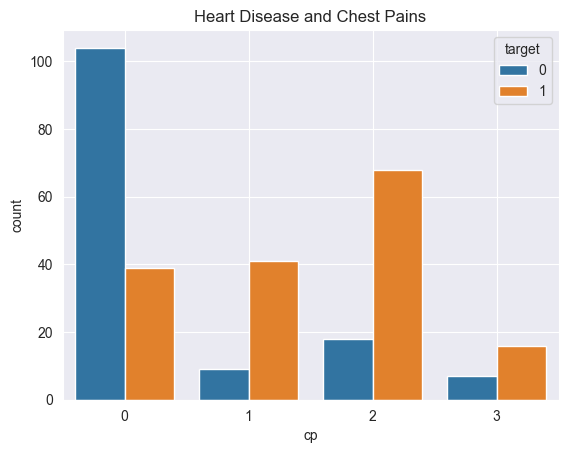

In [82]:
# Identifying which type of chest pain is more prone to heart disease
sns.countplot(df, x = 'cp', hue = 'target')
plt.title('Heart Disease and Chest Pains')
plt.grid(True)
plt.show()

**Which age group is more prone to heart disease**

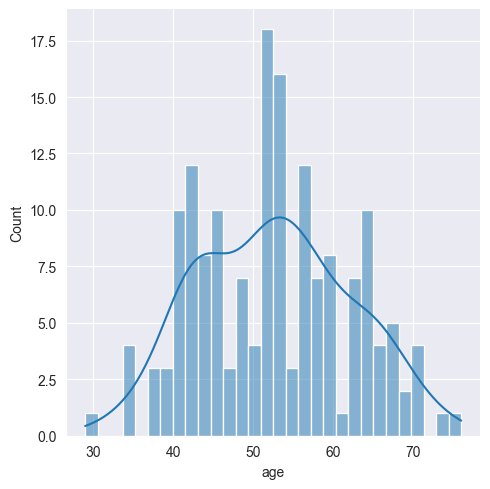

In [76]:
# Identifying which age group is more prone to heart disease
target_age = df.query("target==1")
sns.displot(target_age, x = 'age', bins =30, kde = True)
plt.grid(True)
plt.show()